Figure 4  

Correlation between flash detection accuracy and number of flashes reported with number of beeps

In [2]:
# Imports
import os
import importlib
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('csv/all_participants.csv')

f1b0 = df[(df['n_flash']==1) & (df['n_beep']==0)]
flash_acc = (
        f1b0.groupby(['sid', 'eye', 'location', 'group'])['accuracy']
        .mean()
        .reset_index()
    )

beep_df = df[df['n_beep'] > 0]
mean_flash = (
    beep_df.groupby(['sid', 'eye', 'location', 'n_beep', 'group'])['response']
    .mean()
    .reset_index()
)

final_df = flash_acc.merge(mean_flash, on=['sid', 'eye', 'location', 'group'], how='left')

# add jitter
final_df['acc_plotting'] = final_df['accuracy'] + np.random.normal(0, 0.01, len(final_df))
final_df['res_plotting'] = final_df['response'] + np.random.normal(0, 0.01, len(final_df))


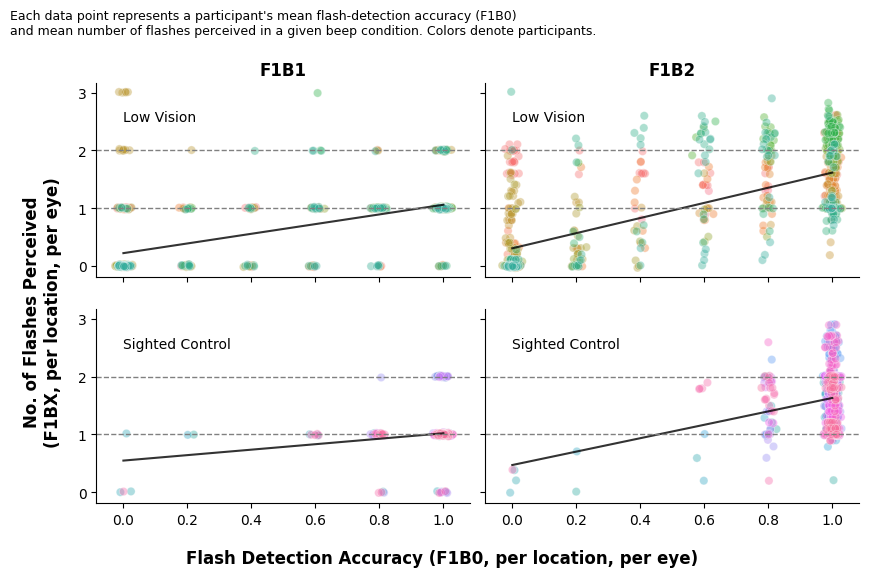

In [4]:
g = sns.relplot(
    data=final_df,
    x='acc_plotting',
    y='res_plotting',
    hue='sid',
    col='n_beep',
    row='group',
    kind='scatter',
    height=3,
    aspect=1.8,
    alpha=0.4,
    legend=False
)

# Add regression lines
g.map_dataframe(sns.regplot, 
                x='accuracy', 
                y='response', 
                scatter=False, 
                color='black', 
                ci=None,
                line_kws={'linewidth': 1.5, 'alpha': 0.8})

# Custom axes spacing and labels
fontsize=12
g.figure.subplots_adjust(left=0.28, top=0.8, bottom=0.1)

for i, ax in enumerate(g.axes.flat):
    ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)
    ax.axhline(y=2, color='gray', linestyle='--', linewidth=1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if i==0:
        ax.set_title("F1B1", fontsize=fontsize, fontweight='bold')
        ax.text(0, 2.5, "Low Vision", fontsize=10)
    elif i==1:
        ax.set_title("F1B2", fontsize=fontsize, fontweight='bold')
        ax.text(0, 2.5, "Low Vision", fontsize=10)
    else:
        ax.set_title('')
        ax.text(0, 2.5, "Sighted Control", fontsize=10)

g.figure.text(0.23, 0.2, "No. of Flashes Perceived\n(F1BX, per location, per eye)", ha='center', rotation=90, fontsize=fontsize, fontweight='bold')
g.figure.text(0.6, 0, "Flash Detection Accuracy (F1B0, per location, per eye)", ha='center', fontsize=fontsize, fontweight='bold')
# g.figure.text(0.6, 1, "Correlation between Flash Detection Accuracy\nand Sound Induced Flash Perceptions", ha='center', fontsize=fontsize, fontweight='bold')

g.figure.text(
    0.2, 0.9,
    "Each data point represents a participant's mean flash-detection accuracy (F1B0)\n"
    "and mean number of flashes perceived in a given beep condition. "
    "Colors denote participants.",
    ha='left', va='center', fontsize=9
)
plt.show()


In [5]:
from scipy.stats import pearsonr

corr_results = []

for (grp, nb), subset in final_df.groupby(['group', 'n_beep']):
    # drop NaNs
    valid = subset.dropna(subset=['accuracy', 'response'])
    if len(valid) > 1:
        r, p = pearsonr(valid['accuracy'], valid['response'])
        corr_results.append({'group': grp, 'n_beep': nb, 'r': r, 'p': p, 'n': len(valid)})
    else:
        corr_results.append({'group': grp, 'n_beep': nb, 'r': None, 'p': None, 'n': len(valid)})

corr_df = pd.DataFrame(corr_results)
corr_df

,group,n_beep,r,p,n
0,Low Vision,1.0,0.654381,2.966765e-124,1008
1,Low Vision,2.0,0.702176,1.414169e-150,1008
2,Sighted Control,1.0,0.206400,3.684454e-11,1008
3,Sighted Control,2.0,0.210862,1.356160e-11,1008
